## 1. Naive Counts vs True Gene Counts Plot

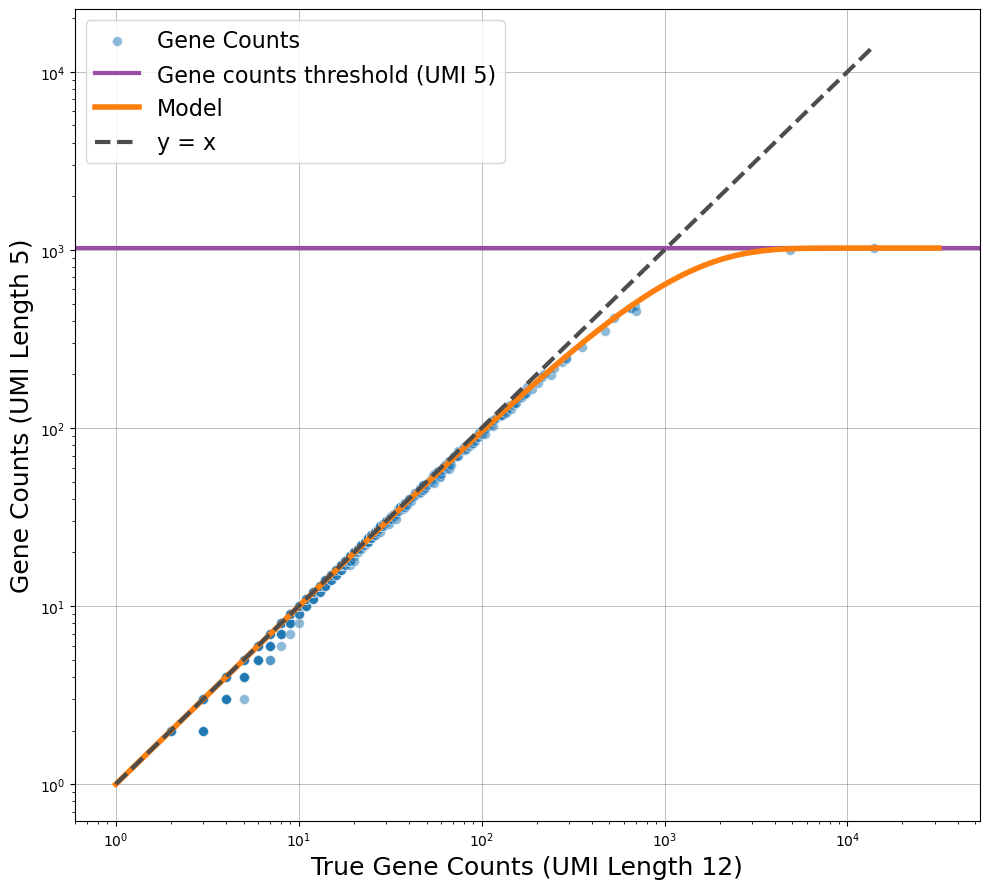

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scanpy as sc

directory = "/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/adata_matrices/"  # Directory for 1k_PBMCs
# directory = "/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ur_objects/adata_matrices/"  # Directory for 1k_PBMCs
# directory = "/data/dagyeman/cellranger/bam_file_analysis/10k_PBMCs/adata_matrices/"    # Directory for 10k PBMCS

adata_dict = {}
for i in range(1, 13):
    adata_dict[i] = sc.read_h5ad(directory + f"adata_{i}.h5ad")
    
    
# Your model function
def f(n_vals, j):
    return 4**j * (1 - (1 - 1 / 4**j)**n_vals)

# Fixed UMI length for "true" counts
i = 12
j = 5  # Fixed comparison UMI length
barcode = "CTACAGACAACAAAGT-1"
n_values = np.logspace(0, 4.5, 200)

# Output directory
save_dir = "/data/dagyeman/cellranger/bam_file_analysis/figures_ur/counts_plots/naive"
os.makedirs(save_dir, exist_ok=True)

# Find the barcode index
index_i = np.where(adata_dict[i].obs_names == barcode)[0][0]
index_j = np.where(adata_dict[j].obs_names == barcode)[0][0]

# Extract and process counts
gene_counts_i = adata_dict[i].X[index_i].flatten()
gene_counts_j = adata_dict[j].X[index_j].flatten()

mask = gene_counts_i >= 1
gene_counts_i = gene_counts_i[mask]
gene_counts_j = gene_counts_j[mask]

sorted_idx = np.argsort(gene_counts_i)
sorted_gene_counts_i = gene_counts_i[sorted_idx] + 1
sorted_gene_counts_j = gene_counts_j[sorted_idx] + 1

# Create plot
plt.figure(figsize=(10, 9))
plt.scatter(sorted_gene_counts_i, sorted_gene_counts_j, alpha=0.5, 
            c='#1f77b4', edgecolors='w', s=50, linewidth=0.5, label='Gene Counts')

y_asymptotic_value = 4**j
plt.axhline(y=y_asymptotic_value, color='#984ea3', linestyle='-', linewidth=3, label=f'Gene counts threshold (UMI {j})')

model_vals = f(n_values, j)
plt.plot(n_values, model_vals, color='#ff7f0e', linewidth=4, label='Model')

max_val = max(sorted_gene_counts_i.max(), sorted_gene_counts_i.max())
plt.plot([1, max_val], [1, max_val], linestyle='--', color='#4D4D4D', linewidth=3, label='y = x')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('True Gene Counts (UMI Length 12)', fontsize=18)
plt.ylabel(f'Gene Counts (UMI Length {j})', fontsize=18)
plt.grid(True, linestyle='-', linewidth=0.5, color='gray', alpha=0.7)
plt.legend(fontsize=16)
plt.tight_layout()

plt.show()



## 2. Predicted Counts vs. True Gene Counts Plot

AnnData object with n_obs × n_vars = 1232 × 28226


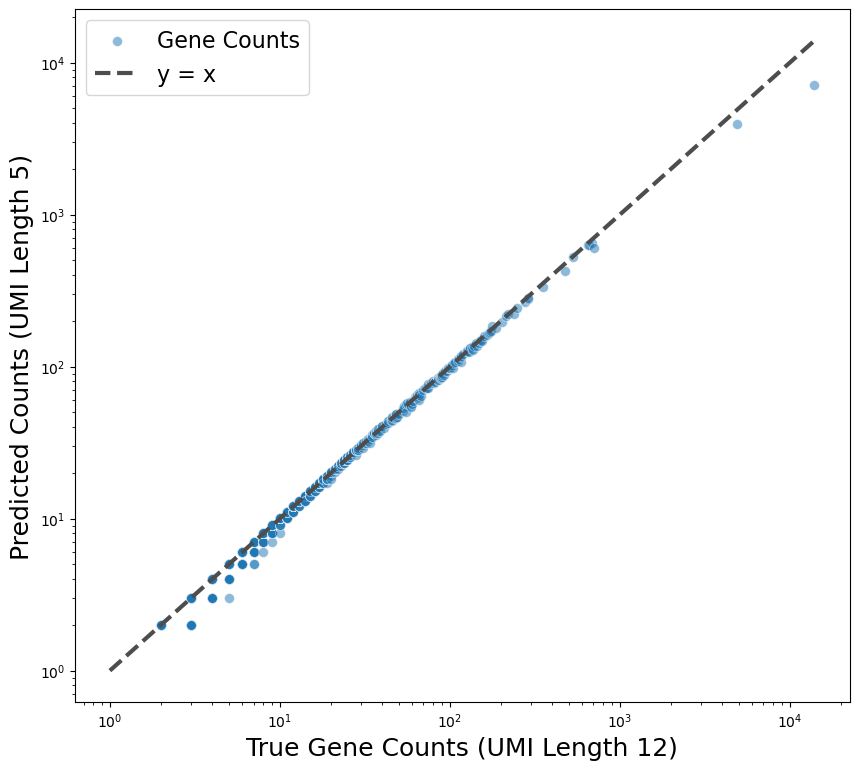

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd


directory = "/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/inverted2_adata_matrices/"  # Directory for 1k_PBMCs
# directory = "/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ur_objects/inverted2_adata_matrices/"  # Directory for 1k_PBMCs


# directory = "/data/dagyeman/cellranger/bam_file_analysis/10k_PBMCs/inverted2_adata_matrices/"    # Directory for 10k PBMCS

adata_dict = {}
for i in range(1, 13):
    adata_dict[i] = sc.read_h5ad(directory + f"adata_inverted_{i}.h5ad")
    
print(adata_dict[6])


# Load the ground truth vector 
# adata_12 = sc.read_h5ad("/data/dagyeman/cellranger/bam_file_analysis/10k_PBMCs/adata_matrices/adata_12.h5ad")
adata_12 = sc.read_h5ad("/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/adata_matrices/adata_12.h5ad")
# adata_12 = sc.read_h5ad("/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ur_objects/adata_matrices/adata_12.h5ad")



# Define the function f(n, 4^j) = 4^j * (1 - (1 - 1/4^j)^n)
def f(n_vals, j):
    results = []
    for n in n_vals:
        result = 4**j * (1 - (1 - 1 / 4**j)**n)
        results.append(result) 
    return np.array(results)

# Define parameters
n_values = np.logspace(0, 4.5, 200)  # Example values for n (or x)
barcode = "CTACAGACAACAAAGT-1"  # 1k dataset
# barcode = "CAGATTGCAGAGTGAC-1"  # 10k dataset 

j = 5  # Fixed j value

# Find the index of the barcode in each AnnData object
index1 = np.where(adata_12.obs_names == barcode)[0][0]
index2 = np.where(adata_dict[j].obs_names == barcode)[0][0]

# Extract the gene counts for the barcode from both AnnData objects
gene_counts1 = adata_12.X[index1].flatten()  # Gene counts for UMI length 12
gene_counts2 = adata_dict[j].X[index2].flatten()  # Gene counts for UMI length j

# Create a boolean mask for gene_counts1 that are greater than or equal to 1
mask = gene_counts1 >= 1 

# Apply the mask to filter gene_counts1 and the corresponding values in gene_counts2
gene_counts1 = gene_counts1[mask]
gene_counts2 = gene_counts2[mask]

# Sort the gene counts based on gene_counts1
sorted_indices = np.argsort(gene_counts1)
sorted_gene_counts1 = gene_counts1[sorted_indices]
sorted_gene_counts2 = gene_counts2[sorted_indices]

# Add 1 to both sorted_gene_counts1 and sorted_gene_counts2 to handle log scale properly
sorted_gene_counts1 = sorted_gene_counts1 + 1
sorted_gene_counts2 = sorted_gene_counts2 + 1

# Create the scatter plot
plt.figure(figsize=(10, 9))
plt.scatter(sorted_gene_counts1, sorted_gene_counts2, alpha=0.5, c='#1f77b4', edgecolors='w', s=50, linewidth=0.5, label='Gene Counts')

# Adding the identity line
max_val = max(sorted_gene_counts1.max(), sorted_gene_counts2.max())
plt.plot([1, max_val], [1, max_val], linestyle='--', color='#4D4D4D', linewidth=3, label='y = x')

# Calculate function values for plotting
f_n_4j = f(n_values, j)

# Uncomment to plot model or asymptotic line if needed
# y_asymptotic_value = 4**j
# plt.axhline(y=y_asymptotic_value, color='purple', linestyle='-', linewidth=3, label=f'Gene counts threshold (UMI {j})')
# plt.plot(n_values, f_n_4j, 'g-', linewidth=4, label="Model")

# Log scale for both axes
plt.xscale('log')
plt.yscale('log')

# Labels and legend
plt.xlabel('True Gene Counts (UMI Length 12)', fontsize=18)
plt.ylabel(f'Predicted Counts (UMI Length {j})', fontsize=18)
# plt.title(f'Inverted Plot vs. Ground Truth (UMI {j})')
plt.legend(fontsize=16)

plt.show()


## 3. MSE AND MAE PLOTS

Ground Truth adata_12:
AnnData object with n_obs × n_vars = 1232 × 28226
Model Dataset (inverted), example adata_dict_model[6]:
AnnData object with n_obs × n_vars = 1232 × 28226
Naive Dataset, example adata_dict_naive[6]:
AnnData object with n_obs × n_vars = 1232 × 28226


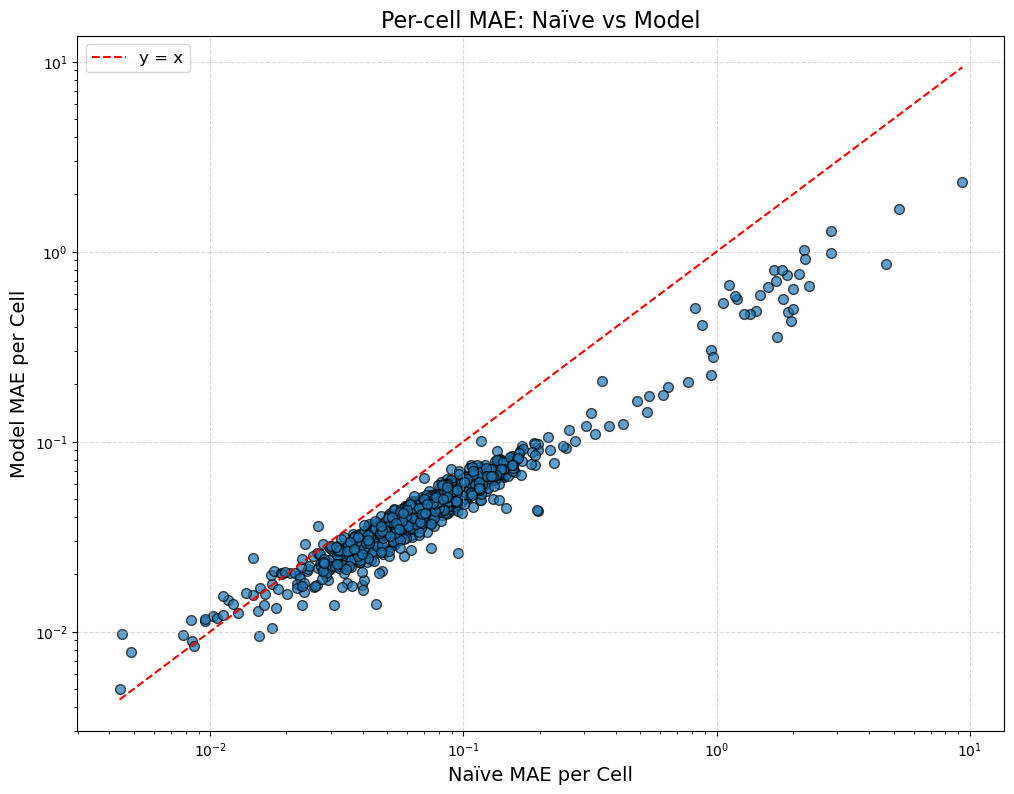

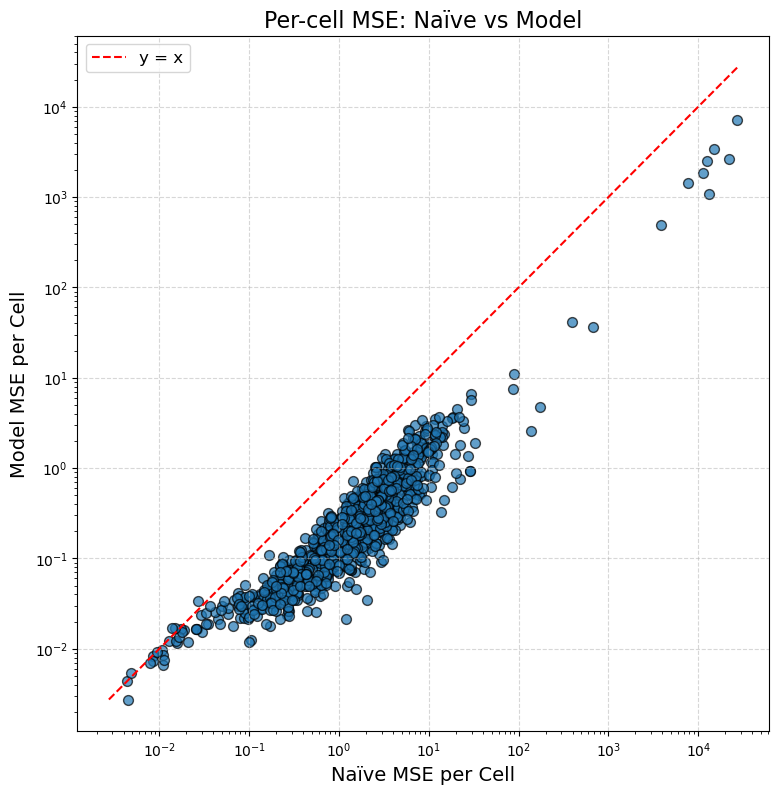

In [3]:
import scanpy as sc
import numpy as np

# --- Function Definitions ---
def calculate_mae(actual, predicted):
    """Calculate Mean Absolute Error (MAE) between two arrays."""
    return np.mean(np.abs(actual - predicted))

def calculate_mse(actual, predicted):
    """Calculate Mean Squared Error (MSE) between two arrays."""
    return np.mean((actual - predicted) ** 2)

def f(n_vals, j):
    """Transformation: f(n, 4^j) = 4^j * (1 - (1 - 1/4^j)^n)."""
    return 4**j * (1 - (1 - 1 / 4**j)**n_vals)

# --- Parameters ---
i = 12  # UMI length for ground truth
j = 5   # UMI length for comparison

# --- Load Datasets ---
# Ground truth dataset (UMI length 12)
adata_12 = sc.read_h5ad("/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/adata_matrices/adata_12.h5ad")
# adata_12 = sc.read_h5ad("/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ur_objects/adata_matrices/adata_12.h5ad")
print("Ground Truth adata_12:")
print(adata_12)

# Inverted dataset for model MAE and MSE (UMI lengths 1-12)
model_dir = "/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/inverted2_adata_matrices/"
# model_dir = "/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ur_objects/inverted2_adata_matrices/"
adata_dict_model = {idx: sc.read_h5ad(model_dir + f"adata_inverted_{idx}.h5ad") for idx in range(1, 13)}
print("Model Dataset (inverted), example adata_dict_model[6]:")
print(adata_dict_model[6])

# Naive dataset (UMI lengths 1-12)
naive_dir = "/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ub_objects/adata_matrices/"
# naive_dir = "/data/dagyeman/cellranger/bam_file_analysis/1k_PBMCs/ur_objects/adata_matrices/"
adata_dict_naive = {idx: sc.read_h5ad(naive_dir + f"adata_{idx}.h5ad") for idx in range(1, 13)}
print("Naive Dataset, example adata_dict_naive[6]:")
print(adata_dict_naive[6])

# --- Compute Per-cell MAE for the Model Approach ---
mae_model_vector = []
for barcode in adata_12.obs_names:
    if barcode in adata_dict_model[j].obs_names:
        idx_12 = np.where(adata_12.obs_names == barcode)[0][0]
        idx_j = np.where(adata_dict_model[j].obs_names == barcode)[0][0]
        gene_counts_12 = adata_12.X[idx_12].flatten()
        gene_counts_j = adata_dict_model[j].X[idx_j].flatten()
        mask = gene_counts_12 >= 1
        true_counts = gene_counts_12[mask] + 1  # Adjust for log scale
        predicted_counts = gene_counts_j[mask] + 1  # Adjust for log scale
        
        mae_model_vector.append(calculate_mae(true_counts, predicted_counts))
mae_model_vector = np.array(mae_model_vector)
# print("Per-cell Model MAE Vector:")
# print(mae_model_vector)

# --- Compute Per-cell MSE for the Model Approach ---
mse_model_vector = []
for barcode in adata_12.obs_names:
    if barcode in adata_dict_model[j].obs_names:
        idx_12 = np.where(adata_12.obs_names == barcode)[0][0]
        idx_j = np.where(adata_dict_model[j].obs_names == barcode)[0][0]
        gene_counts_12 = adata_12.X[idx_12].flatten()
        gene_counts_j = adata_dict_model[j].X[idx_j].flatten()
        mask = gene_counts_12 >= 1
        true_counts = gene_counts_12[mask] + 1  # Adjust for log scale
        predicted_counts = gene_counts_j[mask] + 1  # Adjust for log scale
        
        mse_model_vector.append(calculate_mse(true_counts, predicted_counts))
mse_model_vector = np.array(mse_model_vector)
# print("Per-cell Model MSE Vector:")
# print(mse_model_vector)

# --- Compute Per-cell MAE for the Naive Approach ---
naive_mae_vector = []
for barcode in adata_dict_naive[i].obs_names:
    if barcode in adata_dict_naive[j].obs_names:
        idx_i = np.where(adata_dict_naive[i].obs_names == barcode)[0][0]
        idx_j = np.where(adata_dict_naive[j].obs_names == barcode)[0][0]
        gene_counts_i = adata_dict_naive[i].X[idx_i].flatten()
        gene_counts_j = adata_dict_naive[j].X[idx_j].flatten()
        mask = gene_counts_i >= 1
        true_counts = gene_counts_i[mask] + 1  # Adjust for log scale
        naive_counts = gene_counts_j[mask] + 1  # Adjust for log scale
        naive_mae_vector.append(calculate_mae(true_counts, naive_counts))
naive_mae_vector = np.array(naive_mae_vector)
# print("Per-cell Naive MAE Vector:")
# print(naive_mae_vector)

# --- Compute Per-cell MSE for the Naive Approach ---
naive_mse_vector = []
for barcode in adata_dict_naive[i].obs_names:
    if barcode in adata_dict_naive[j].obs_names:
        idx_i = np.where(adata_dict_naive[i].obs_names == barcode)[0][0]
        idx_j = np.where(adata_dict_naive[j].obs_names == barcode)[0][0]
        gene_counts_i = adata_dict_naive[i].X[idx_i].flatten()
        gene_counts_j = adata_dict_naive[j].X[idx_j].flatten()
        mask = gene_counts_i >= 1
        true_counts = gene_counts_i[mask] + 1  # Adjust for log scale
        naive_counts = gene_counts_j[mask] + 1  # Adjust for log scale
        naive_mse_vector.append(calculate_mse(true_counts, naive_counts))
naive_mse_vector = np.array(naive_mse_vector)
# print("Per-cell Naive MSE Vector:")
# print(naive_mse_vector)



import matplotlib.pyplot as plt

# --- MAE Plot ---
plt.figure(figsize=(10, 8))
plt.scatter(naive_mae_vector, mae_model_vector, alpha=0.7, edgecolor='k', s=50)
plt.xlabel("Naïve MAE per Cell", fontsize=14)
plt.ylabel("Model MAE per Cell", fontsize=14)
plt.title("Per-cell MAE: Naïve vs Model", fontsize=16)

# Identity line for reference
min_val = min(naive_mae_vector.min(), mae_model_vector.min())
max_val = max(naive_mae_vector.max(), mae_model_vector.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='y = x')
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.xscale('log')
plt.yscale('log')

# Save the MAE plot image
# plt.savefig("/data/dagyeman/cellranger/bam_file_analysis/figures_ub/mae_mse_plots/1k_per_cell_mae_naive_vs_model.pdf")
plt.savefig("/data/dagyeman/cellranger/bam_file_analysis/figures_ur/mae_mse_plots/1k_per_cell_mae_naive_vs_model.pdf")
plt.show()

# --- MSE Plot ---
plt.figure(figsize=(8, 8))
plt.scatter(naive_mse_vector, mse_model_vector, alpha=0.7, edgecolor='k', s=50)
plt.xlabel("Naïve MSE per Cell", fontsize=14)
plt.ylabel("Model MSE per Cell", fontsize=14)
plt.title("Per-cell MSE: Naïve vs Model", fontsize=16)

# Identity line for reference
min_val = min(naive_mse_vector.min(), mse_model_vector.min())
max_val = max(naive_mse_vector.max(), mse_model_vector.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='y = x')
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.xscale('log')
plt.yscale('log')

# Save the MSE plot image
# plt.savefig("/data/dagyeman/cellranger/bam_file_analysis/figures_ub/mae_mse_plots/1k_per_cell_mse_naive_vs_model.pdf")
plt.savefig("/data/dagyeman/cellranger/bam_file_analysis/figures_ur/mae_mse_plots/1k_per_cell_mse_naive_vs_model.pdf")
plt.show()